## To do: columns
- **Id** - Player’s Id
- **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
- **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
---
- **boosts** - Number of boost items used.
- **heals** - Number of healing items used.
- **weaponsAcquired** - Number of weapons picked up.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **vehicleDestroys** - Number of vehicles destroyed.
---
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.min_rows', 20)
# pd.set_option('display.max_columns', 35)

In [2]:
data = pd.read_csv("/Users/krc/PycharmProjects/machine_learning/data/raw/train_V2.csv.zip")

In [3]:
df = data.copy()

In [4]:
df = df.dropna()

In [6]:
# name_list = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
# df = df[df["matchType"].isin(name_list) == True]

In [7]:
# df.matchType.value_counts()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
# df.isnull().sum()

In [5]:
df_todo = df.loc[:,["kills", "matchType", "boosts","heals","weaponsAcquired","rideDistance"
                    ,"swimDistance","walkDistance","roadKills","vehicleDestroys"
                    ,"winPlacePerc"]]

### columns 특성
- 연속형 변수 : "rideDistance","swimDistance","walkDistance","winPlacePerc"
- 이산형 변수 : "boosts","heals","weaponsAcquired","roadKills","vehicleDestroys"

In [9]:
df_todo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   boosts           int64  
 1   heals            int64  
 2   weaponsAcquired  int64  
 3   rideDistance     float64
 4   swimDistance     float64
 5   walkDistance     float64
 6   roadKills        int64  
 7   vehicleDestroys  int64  
 8   winPlacePerc     float64
dtypes: float64(4), int64(5)
memory usage: 339.3 MB


In [10]:
df_todo.describe()

,boosts,heals,weaponsAcquired,rideDistance,swimDistance,walkDistance,roadKills,vehicleDestroys,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,1.106908e+00,1.370148e+00,3.660488e+00,6.061158e+02,4.509323e+00,1.154218e+03,3.496092e-03,7.918209e-03,4.728216e-01
std,1.715794e+00,2.679982e+00,2.456543e+00,1.498344e+03,3.050220e+01,1.183497e+03,7.337297e-02,9.261158e-02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,0.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,0.000000e+00,0.000000e+00,4.583000e-01
75%,2.000000e+00,2.000000e+00,5.000000e+00,1.910000e-01,0.000000e+00,1.976000e+03,0.000000e+00,0.000000e+00,7.407000e-01
max,3.300000e+01,8.000000e+01,2.360000e+02,4.071000e+04,3.823000e+03,2.578000e+04,1.800000e+01,5.000000e+00,1.000000e+00


### total variable 만들기
- total_item
- total_distance

In [6]:
df["total_item"] = df.boosts + df.heals
df["total_distance"] = df.rideDistance + df.walkDistance + df.swimDistance

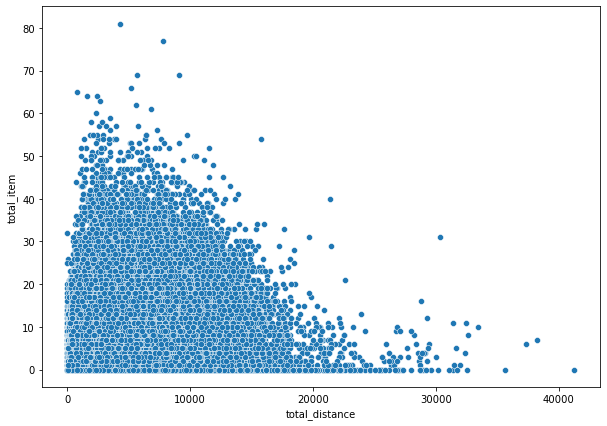

In [81]:
scatterplot(df.total_distance,df.total_item)

---

## correlation
walkDistance: 0.81  
오래 살아남으면, 많이 걸을 수밖에 없다!
> 많이 걸었는데, 낮은 등수가 얼마나 있을까?

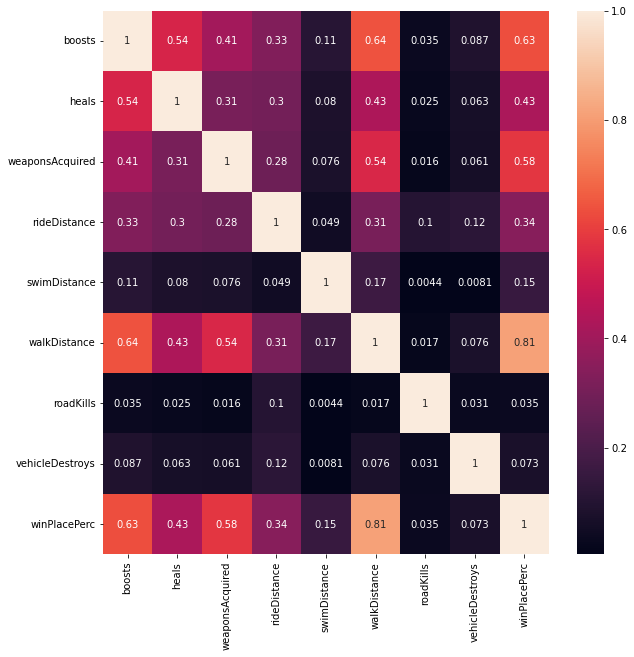

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_todo.corr(),
            annot=True)
plt.show()

In [13]:
df_todo_discrete = df_todo.loc[:,["boosts","heals","weaponsAcquired","roadKills"
                                  ,"vehicleDestroys"]]
df_todo_continuous = df_todo.loc[:,["rideDistance","swimDistance","walkDistance"]]

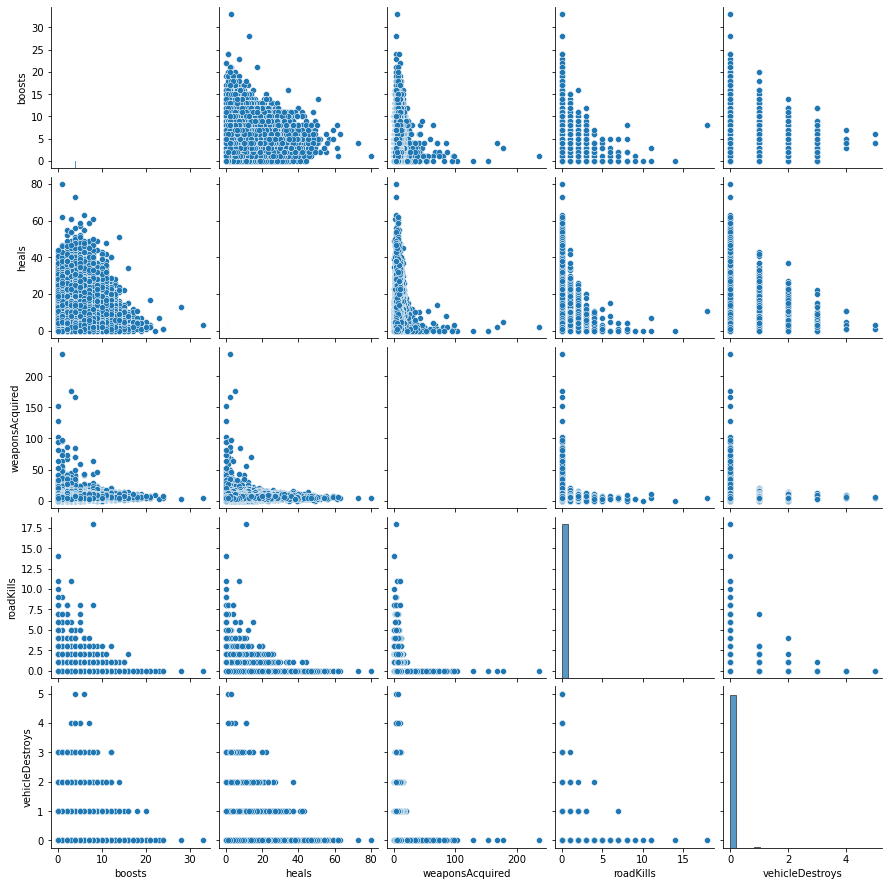

In [10]:
sns.pairplot(df_todo_discrete)

---

## def PLOT

In [7]:
def countplot(columns,xsize=10,ysize=7,hue=None):
    plt.figure(figsize=(xsize,ysize))
    sns.countplot(columns,hue=hue)
    plt.show()
    print(columns.value_counts())

In [8]:
def boxplot(columns,xsize=10,ysize=7):
    plt.figure(figsize=(xsize,ysize))
    sns.boxplot(columns)
    plt.show()

In [22]:
# def subplot(shape_row,shape_col,x=10,y=7):
#     plt.figure(figsize=(x,y))
#     for i in range(shape_row*shape_col):
#         plt.subplot(shape_row,shape_col,i+1)
#         plots = input("plot code:")
#     plt.show()

In [9]:
def scatterplot(columns_1,columns_2,x=10,y=7,hue=None,alpha=None,size=None,style=None):
    plt.figure(figsize=(x,y))
    sns.scatterplot(x=columns_1,y=columns_2,hue=hue,alpha=alpha,size=size,style=style)
    plt.show()

---
### Outlier detection

## 정규분포일때, 이상치 판단 기준
아래 기준을 벗어나는 경우에, 데이터 비율이 같은 경우!

In [24]:
# Q1 = df.heals.quantile(.25)
# Q3 = df.heals.quantile(.75)
# print(Q1,Q3)
# LC = Q1 - 1.5 * (Q3 - Q1) # 하위 기준
# UC = Q3 + 1.5 * (Q3 - Q1) # 상위 기준

In [30]:
df_todo.columns

Index(['boosts', 'heals', 'weaponsAcquired', 'rideDistance', 'swimDistance',
       'walkDistance', 'roadKills', 'vehicleDestroys', 'winPlacePerc'],
      dtype='object')

### Discrete distribution

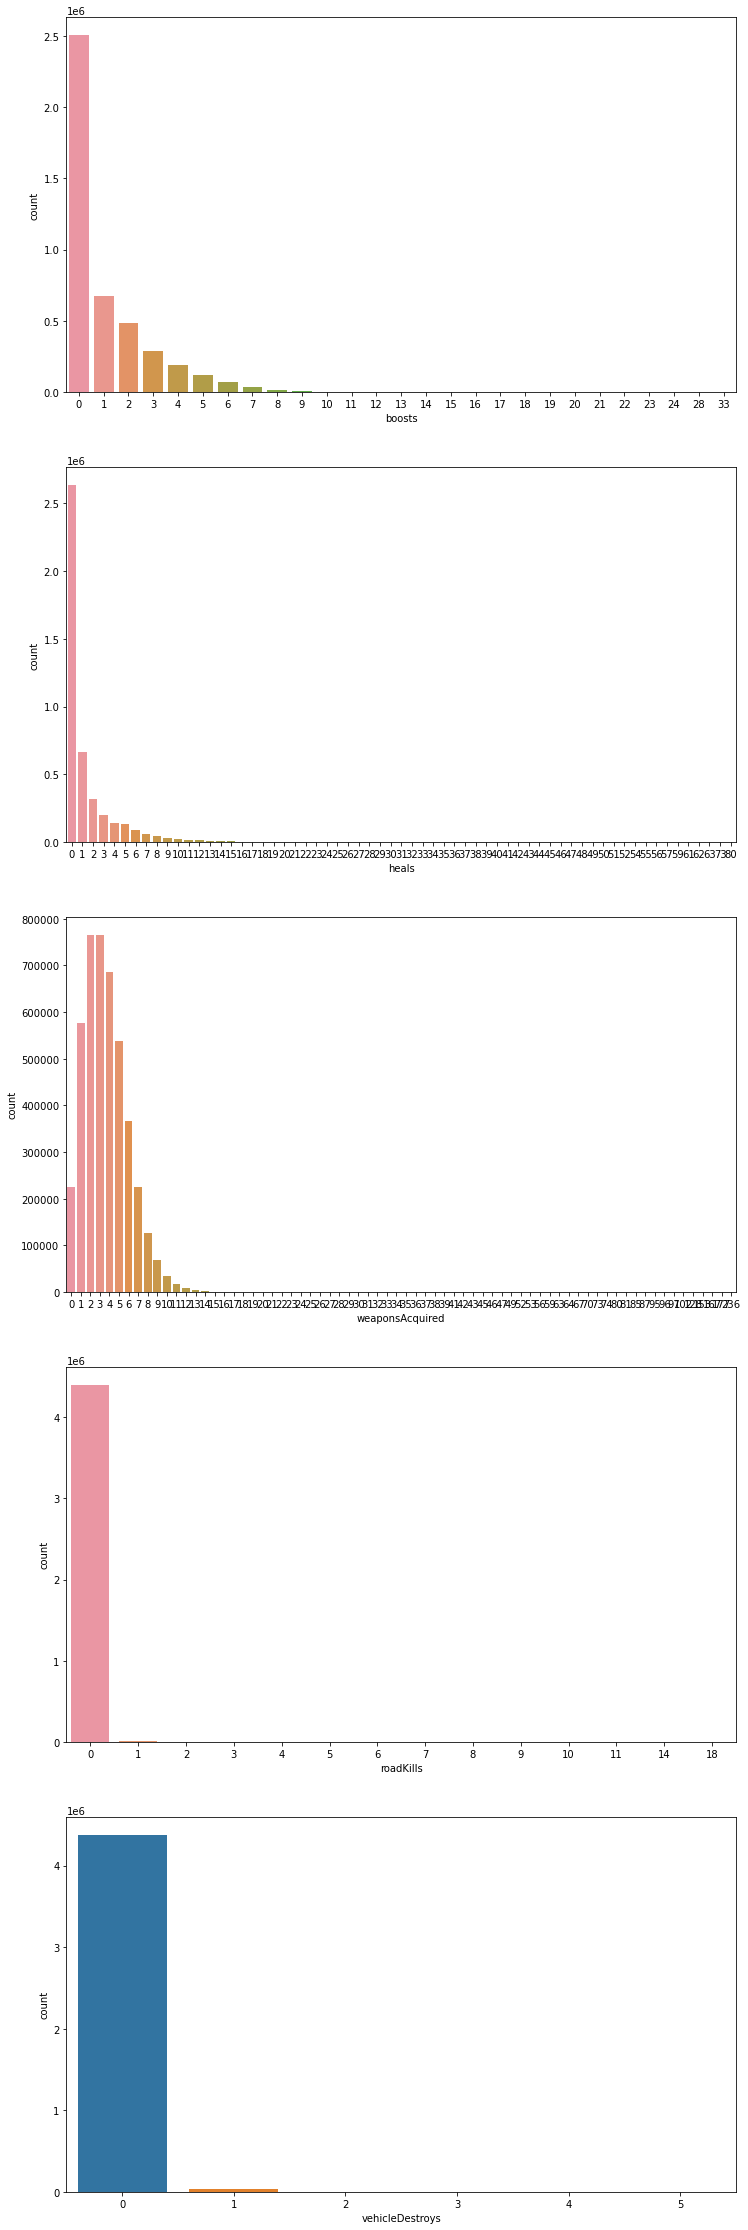

In [11]:
plt.figure(figsize=(12,len(df_todo_discrete.columns)*8))
for i in range(len(df_todo_discrete.columns)):
    plt.subplot(len(df_todo_discrete.columns),1,i+1)
    sns.countplot(data=df,x=df_todo_discrete.columns[i])
plt.show()

## boosts

In [204]:
df.boosts.quantile(0.99)
print(f"drop rows : {len(df)-len(df[df.boosts <= 7])}")

drop rows : 34136


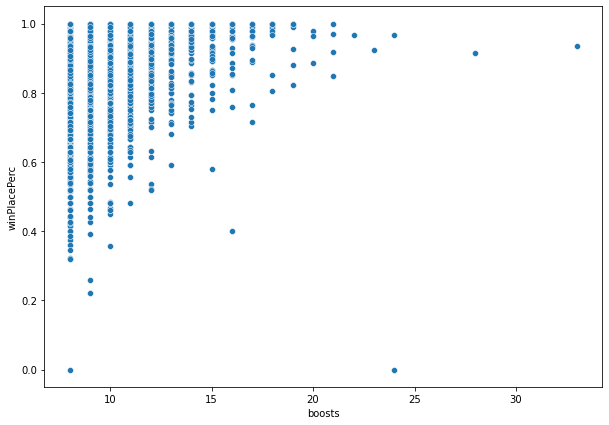

In [25]:
scatterplot(df[df.boosts > 7].boosts,df.winPlacePerc)

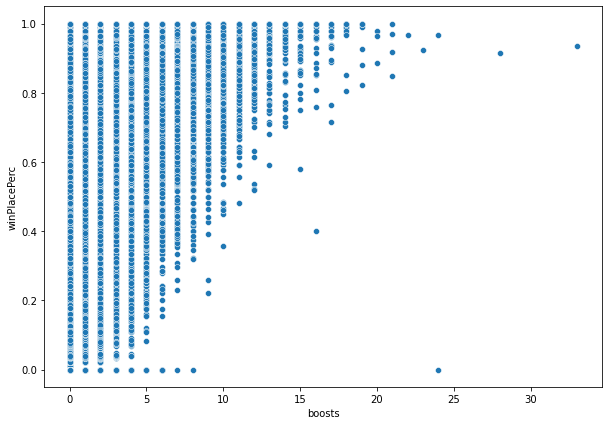

In [27]:
scatterplot(df.boosts,df.winPlacePerc)

boosts outlier

In [19]:
df[df.boosts>22][df.winPlacePerc<0.2]

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_1495/2178354479.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.boosts>22][df.winPlacePerc<0.2]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_item,total_distance
3979434,d16b329d5ea64f,ba50388b7256f1,57770aadb2235b,0,24,0.0,0,0,1,4,...,0,0.0,0,0,267.3,8,0,0.0,25,267.3


In [10]:
df_drop = df.copy()

In [11]:
df_drop = df_drop.drop(df_drop[df_drop.boosts>22][df_drop.winPlacePerc<0.2].index)

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_3050/2268741575.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop = df_drop.drop(df_drop[df_drop.boosts>22][df_drop.winPlacePerc<0.2].index)


## heals - no outliers

In [23]:
df_drop.heals.quantile(0.99)
print(f"drop rows : {len(df_drop)-len(df_drop[df_drop.heals <= 12])}")

drop rows : 43032


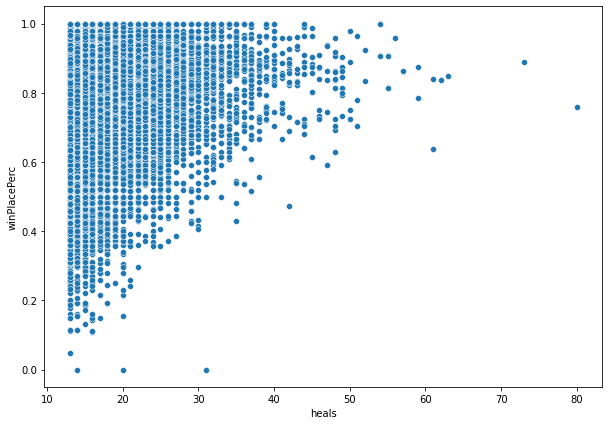

In [77]:
scatterplot(df_drop[df_drop.heals>12].heals, df_drop.winPlacePerc)

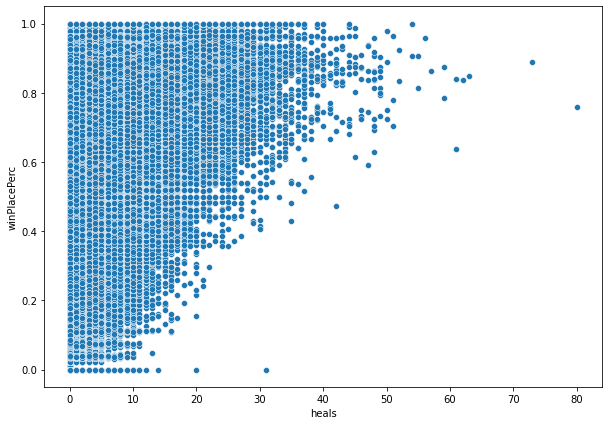

In [78]:
scatterplot(df_drop.heals, df_drop.winPlacePerc)

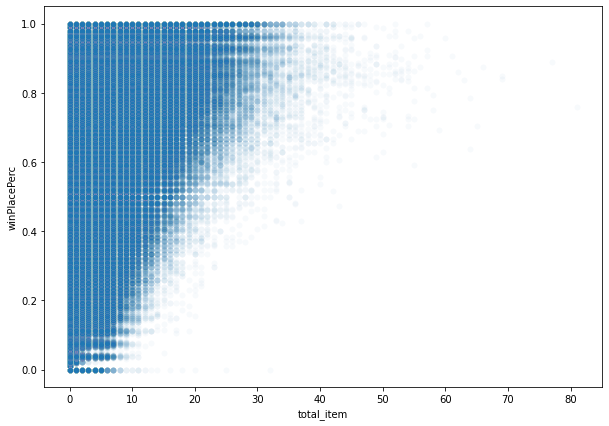

In [84]:
scatterplot(df.total_item, df.winPlacePerc,alpha=0.03)

In [24]:
df_drop[df_drop.winPlacePerc==0][df_drop.total_item>10]

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_1495/3692317368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop[df_drop.winPlacePerc==0][df_drop.total_item>10]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_item,total_distance
32453,c525184d3a47df,94871c112912f3,93edb943c25530,2,6,1250.00,0,7,6,8,...,0,0.0,0,0,1601.00,20,0,0.0,12,1601.00
126277,b6257cf0084c93,5a38ac22a90400,2ac76e61afb25a,5,3,711.90,6,1,8,14,...,0,0.0,0,0,1118.00,6,0,0.0,11,3200.00
288773,cd9359a3dabbbe,d18dedb8a813e7,9a4e500e3cf355,2,0,384.00,0,1,11,27,...,0,0.0,0,0,3175.00,16,0,0.0,11,5410.00
351887,5f6924d85214e5,eda174acfb503b,4c6b1a0e4cb346,1,0,257.90,0,0,14,35,...,0,0.0,1,0,0.00,10,0,0.0,14,0.00
466813,b79cb5273c905c,14d6b54cdec6bc,b30f3d87189aa6,0,0,31.56,0,0,13,47,...,0,0.0,0,0,2404.00,12,0,0.0,13,4782.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219202,bf120fb85b7c4c,7e2ebcef93df28,313c9787226bbe,2,0,1229.00,16,4,31,10,...,0,0.0,0,0,98.56,16,0,0.0,31,98.56
4307021,6cba80c02371f0,dd6b1da9277e2f,b06aa721ab324a,4,0,1525.00,0,4,11,13,...,0,0.0,0,0,513.30,39,1500,0.0,11,513.30
4313076,190d571e326f1a,eda174acfb503b,4c6b1a0e4cb346,5,0,1323.00,0,2,25,12,...,0,0.0,0,0,119.00,35,0,0.0,25,119.00
4343400,d2e69b70d33f5a,dc62ff0dd7a312,6ee2c835176181,3,0,1600.00,18,2,12,7,...,0,0.0,0,0,1503.00,27,0,0.0,12,1574.03


---

## winPlacePerc 를, 상위등수 중위 하위등수로 나누어서 분석

In [12]:
df_drop["winPlaceCate"] = pd.cut(df_drop.winPlacePerc, bins=[-1,0.1,0.9,1.1], #나누는 구간 #bins=3이면 동일한 길이의 3구간으로 나누어짐
labels=["low","middle","top"] #label명 #labels를 입력하지 않으면 나눈 기준이 label명이 됌
)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


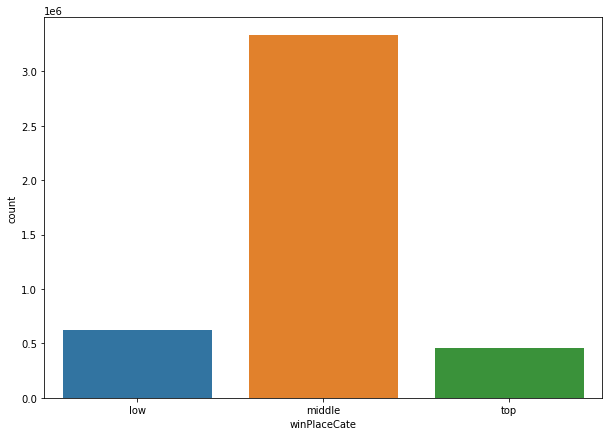

middle    3329565
low        621385
top        459980
Name: winPlaceCate, dtype: int64


In [163]:
countplot(df_drop.winPlaceCate)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='winPlacePerc', ylabel='Density'>

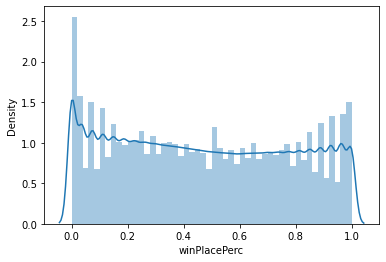

In [120]:
sns.distplot(df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


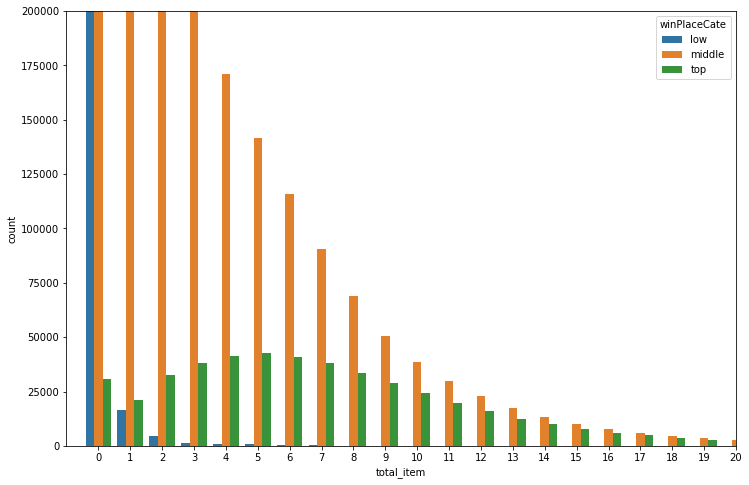

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.total_item,hue=df_drop.winPlaceCate)
plt.xlim([-1,20])
plt.ylim([0,200000])
plt.show()

In [165]:
df_drop[df_drop.total_item==0].winPlaceCate.value_counts()

middle    1569724
low        597622
top         29516
Name: winPlaceCate, dtype: int64

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


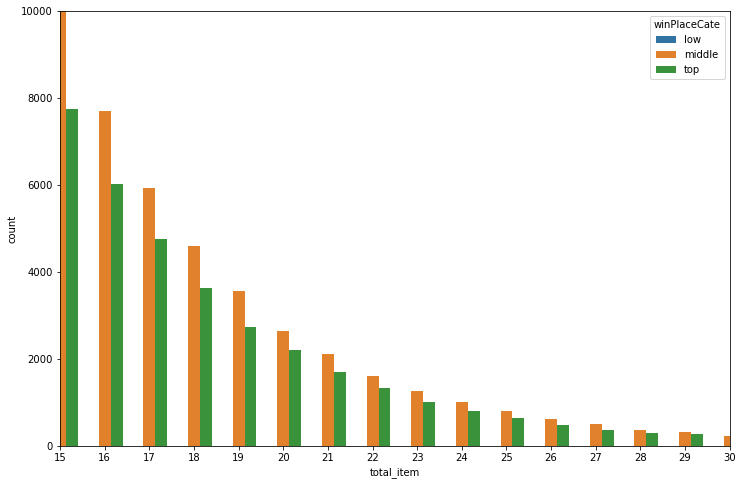

In [167]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.total_item,hue=df_drop.winPlaceCate)
plt.xlim([15,30])
plt.ylim([0,10000])
plt.show()

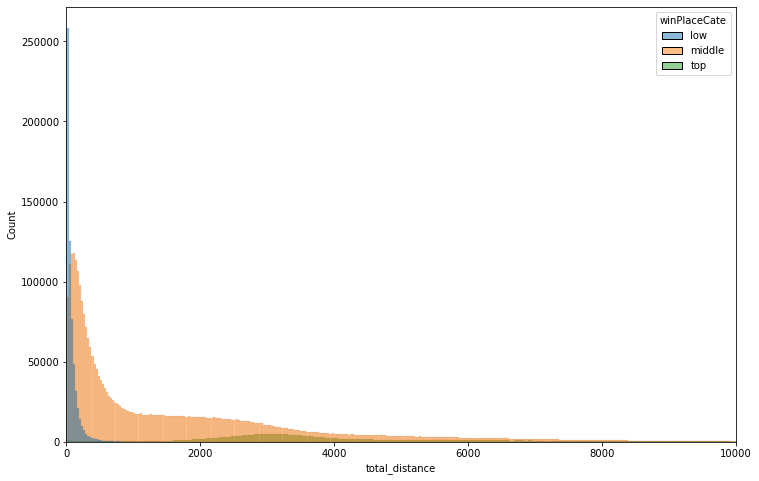

In [168]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_drop, x="total_distance",hue="winPlaceCate")
plt.xlim([0,10000])
plt.show()

---


### Continuous distribution

In [33]:
df[["rideDistance","walkDistance","swimDistance"]].describe()

,rideDistance,walkDistance,swimDistance
count,4.411698e+06,4.411698e+06,4.411698e+06
mean,5.961054e+02,1.153563e+03,4.511949e+00
std,1.484263e+03,1.184020e+03,3.041554e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.545000e+02,0.000000e+00
50%,0.000000e+00,6.824000e+02,0.000000e+00
75%,9.700000e-03,1.977000e+03,0.000000e+00
max,4.071000e+04,2.578000e+04,3.514000e+03


/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

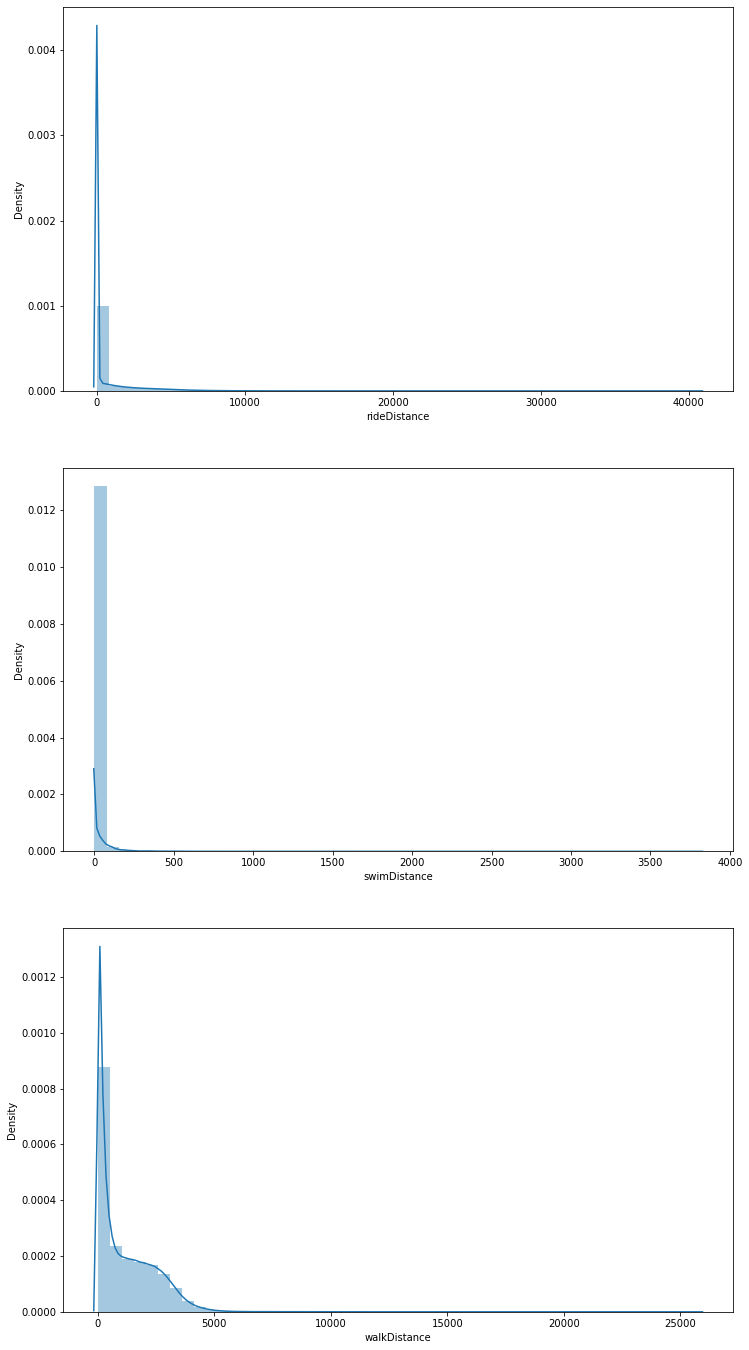

In [25]:
plt.figure(figsize=(12,len(df_todo_continuous.columns)*8))
plt.subplot(len(df_todo_continuous.columns),1,1)
sns.distplot(df.rideDistance)
plt.subplot(len(df_todo_continuous.columns),1,2)
sns.distplot(df.swimDistance)
plt.subplot(len(df_todo_continuous.columns),1,3)
sns.distplot(df.walkDistance)
plt.show()

## total_distance outlier
- distance가 0이면서, winPlacePerc가 1인 것들 이상치로 판단

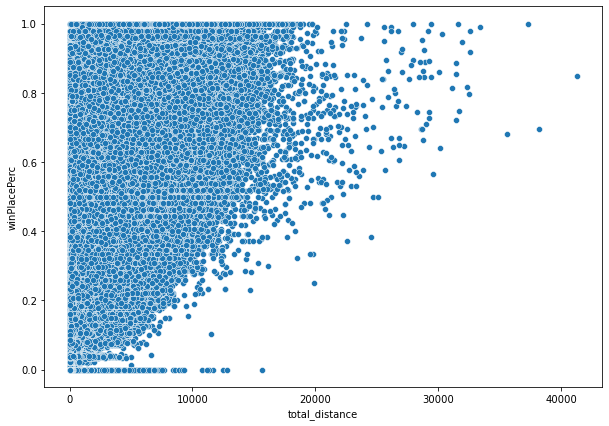

In [170]:
scatterplot(df_drop.total_distance,df_drop.winPlacePerc)

In [171]:
df_drop=df_drop.drop(df_drop[df_drop.winPlacePerc==1][df_drop.total_distance==0].index)

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_2192/598386244.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop=df_drop.drop(df_drop[df_drop.winPlacePerc==1][df_drop.total_distance==0].index)


---

## weaponAcquired

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


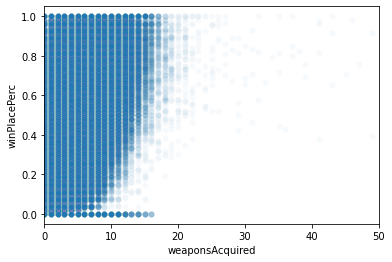

In [216]:
sns.scatterplot(df_drop.weaponsAcquired,df_drop.winPlacePerc, alpha=0.03)
plt.xlim([0,50])
plt.show()

In [221]:
df_drop = df_drop.drop(df_drop[df_drop.weaponsAcquired>30].index)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


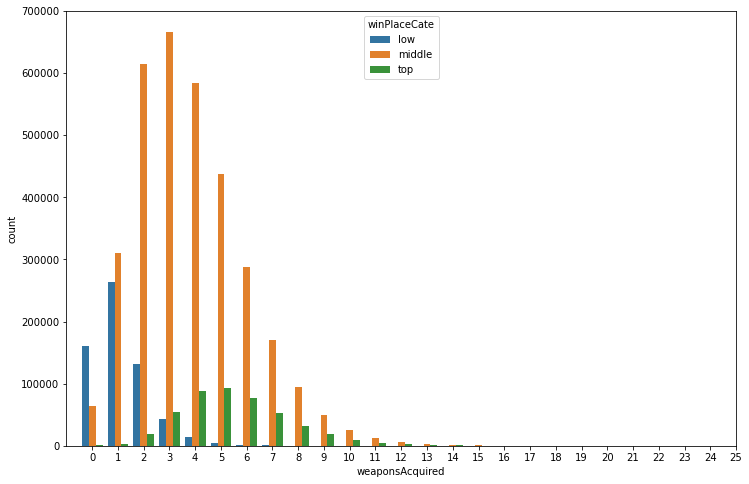

In [177]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.weaponsAcquired,hue=df_drop.winPlaceCate)
plt.xlim([-1,25])
# plt.ylim([0,10000])
plt.show()

weaponsAcquired outlier

In [179]:
df_drop = df_drop.drop(df_drop[df_drop.winPlacePerc==0][df_drop.weaponsAcquired>16].index)

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_2192/3014321101.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop = df_drop.drop(df_drop[df_drop.winPlacePerc==0][df_drop.weaponsAcquired>16].index)


---
## roadKills - outlier 없음

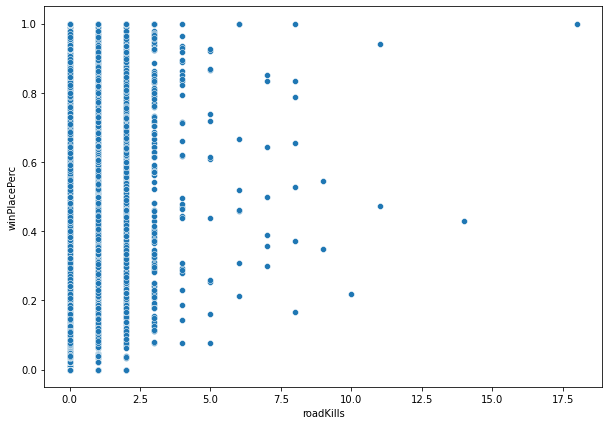

In [182]:
scatterplot(df_drop.roadKills,df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


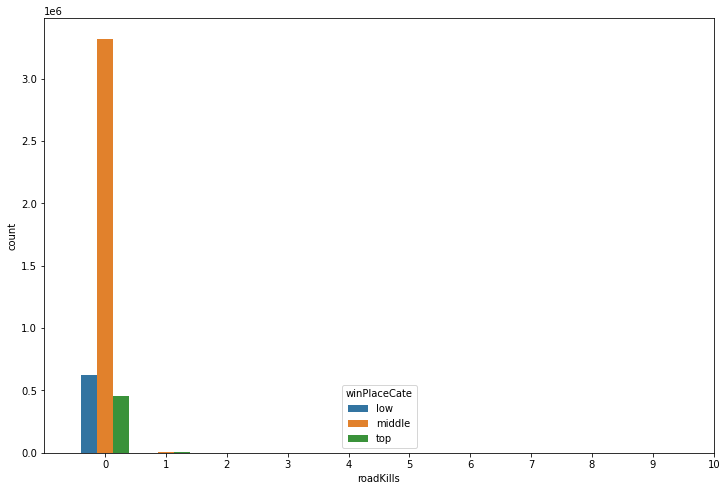

In [190]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.roadKills,hue=df_drop.winPlaceCate)
plt.xlim([-1,10])
# plt.ylim([0,10000])
plt.show()

In [191]:
df_drop.roadKills.value_counts()

0     4399207
1       10426
2         994
3         146
4          32
5          13
6           8
8           7
7           7
9           2
11          2
14          1
18          1
10          1
Name: roadKills, dtype: int64

In [195]:
df_drop.roadKills.quantile(0.999)

1.0

In [197]:
df_drop[df_drop.roadKills>2].winPlaceCate.value_counts()

middle    168
top        48
low         4
Name: winPlaceCate, dtype: int64

---
## vehicleDestroys - outlier 없음

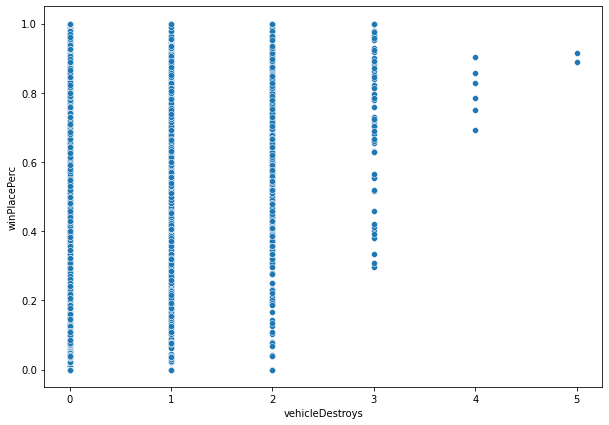

In [198]:
scatterplot(df_drop.vehicleDestroys,df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


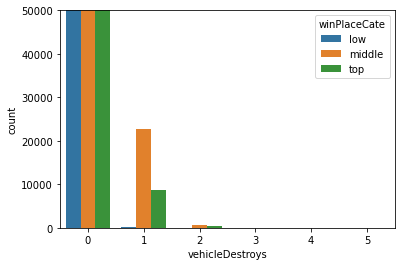

In [202]:
sns.countplot(df_drop.vehicleDestroys,hue=df_drop.winPlaceCate)
plt.ylim([0,50000])
plt.show()

---
## strange data
weaponsAcquired==0 and winPlacePerc==1

In [225]:
df_drop=df_drop.drop(df_drop[df_drop.weaponsAcquired==0][df_drop.winPlacePerc==1].index)

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_2192/3132441101.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop=df_drop.drop(df_drop[df_drop.weaponsAcquired==0][df_drop.winPlacePerc==1].index)


---

## map 크기에 따라서 다른 분포를 나타낸다
봉우리가 2개!!

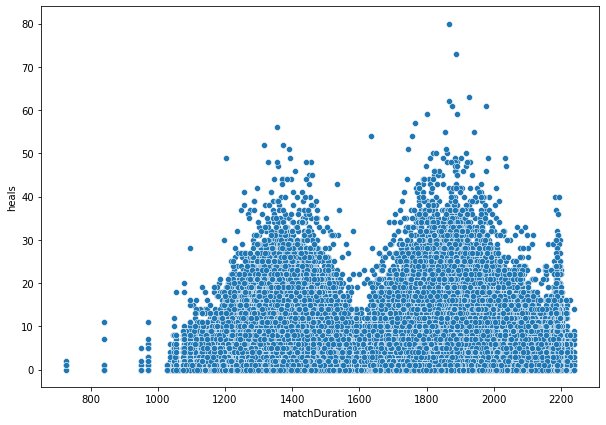

In [58]:
scatterplot(df.matchDuration,df.heals)

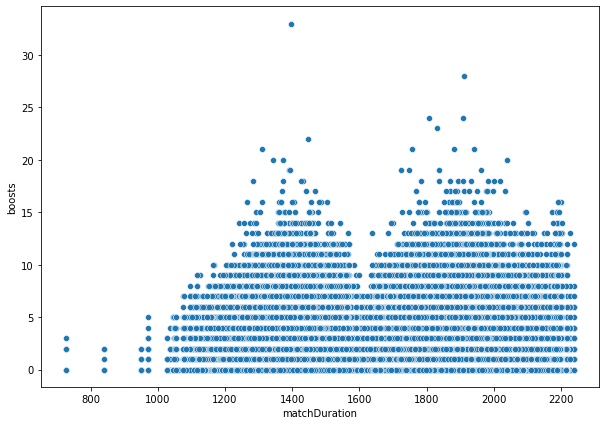

In [31]:
scatterplot(df.matchDuration,df.boosts)

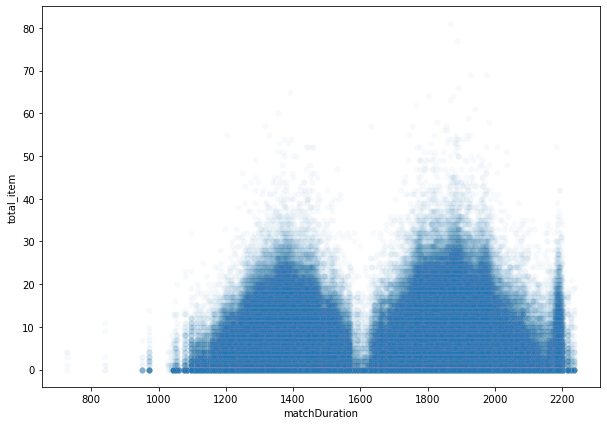

In [59]:
scatterplot(df.matchDuration,df.total_item,alpha=0.03)

---
## 노잼 사망(하루종일 파밍)

In [61]:
tedious_play = df[(df.heals==0)][df.boosts==0][df.matchDuration>1800]

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_1656/3782159478.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tedious_play = df[(df.heals==0)][df.boosts==0][df.matchDuration>1800]


/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


596.1053845555161 370.32350445498656
4.51194873384352 1.6828717980425638


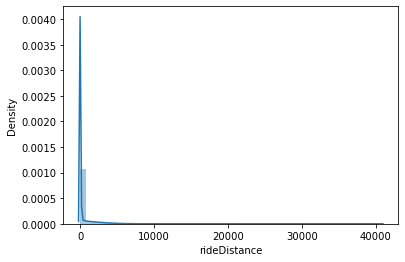

In [63]:
sns.distplot(tedious_play.rideDistance)
print(df.rideDistance.mean()
    ,tedious_play.rideDistance.mean())
print(df.swimDistance.mean()
    ,tedious_play.swimDistance.mean())

---

## 다중공선성 의심 kills <-> damageDealt
하나의 데이터만 머신러닝에 사용  
VIF 활용

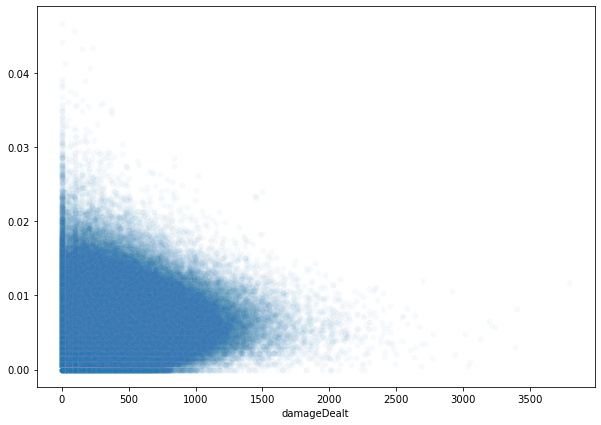

In [70]:
scatterplot(df.damageDealt,df.per_item,alpha=0.03)

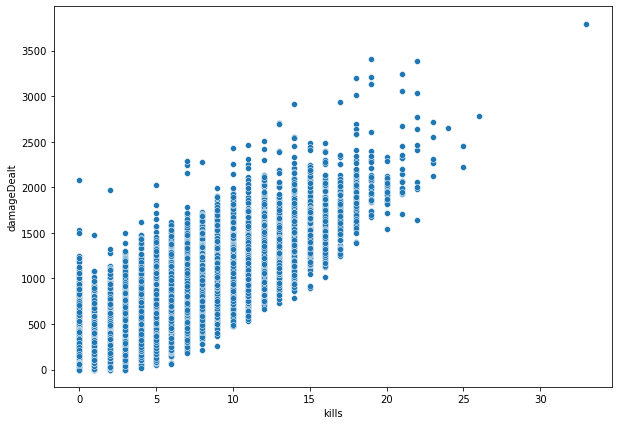

In [69]:
scatterplot(df.kills,df.damageDealt)

-----

## 사용자설정게임 여부
- "ma"==0 : ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
- "ma"==1 : other

In [22]:
name_list = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
df_todo_true = df_todo[df_todo["matchType"].isin(name_list) == True]
df_todo_true["ma"] = "general game"
# df_todo_true.tail(2)
df_todo_false = df_todo[df_todo["matchType"].isin(name_list) == False]
df_todo_false["ma"] = "custom game"
# df_todo_false.tail(2)
df_todo_concat = pd.concat([df_todo_true,df_todo_false],axis=0)
# df_todo_concat.tail()

/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_3050/38442056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todo_true["ma"] = "general game"
/var/folders/rk/whxrmrj90vd4jhk9fn22sxsh0000gn/T/ipykernel_3050/38442056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todo_false["ma"] = "custom game"


In [24]:
df_todo_concat.ma.value_counts()
df_todo_concat.columns
df_todo_concat["total_item"] = df_todo_concat.boosts + df_todo_concat.heals
df_todo_concat["total_distance"] = df_todo_concat.rideDistance + df_todo_concat.walkDistance + df_todo_concat.swimDistance

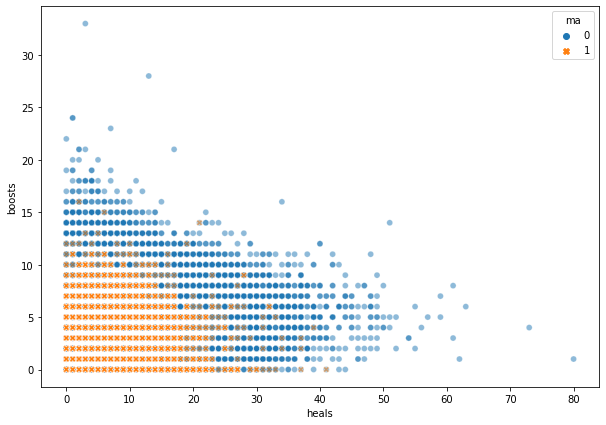

In [17]:
scatterplot(df_todo_concat.heals,df_todo_concat.boosts,hue=df_todo_concat.ma,alpha=0.5,style=df_todo_concat.ma)

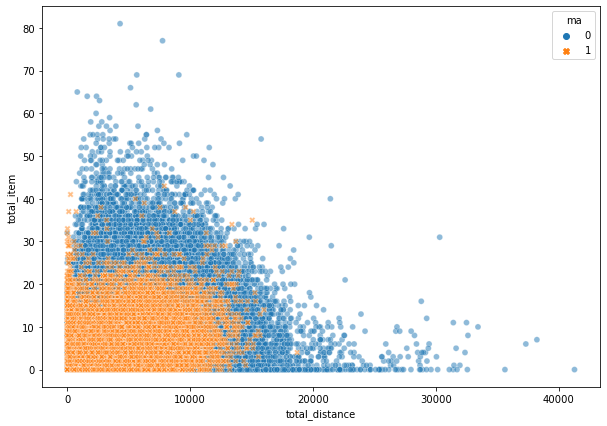

In [20]:
scatterplot(df_todo_concat.total_distance,df_todo_concat.total_item,hue=df_todo_concat.ma,alpha=0.5,style=df_todo_concat.ma)

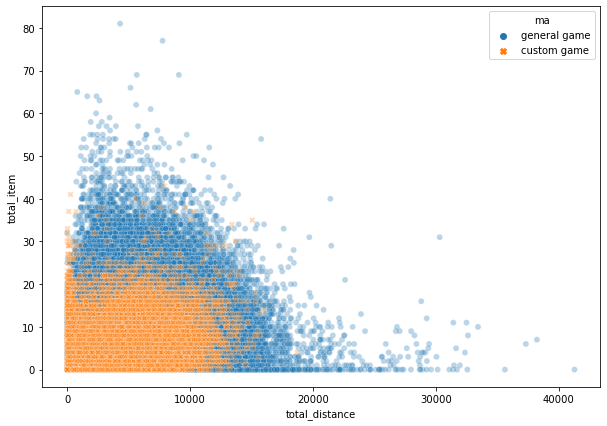

In [25]:
scatterplot(df_todo_concat.total_distance,df_todo_concat.total_item,hue=df_todo_concat.ma,alpha=0.3,style=df_todo_concat.ma)

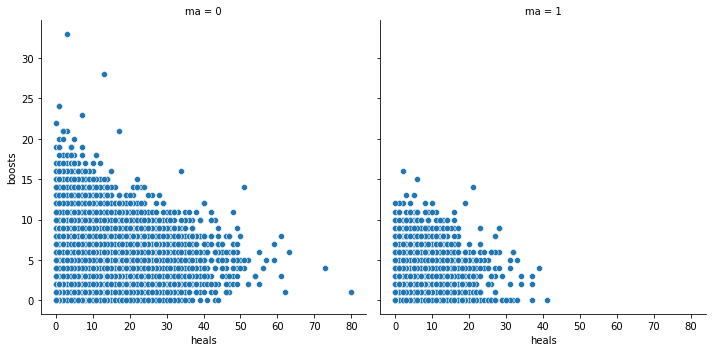

In [175]:
sns.relplot(
    data=df_todo_concat, x="heals", y="boosts",
    col="ma",kind="scatter"
)

In [ ]:
# sns.pointplot(x='heals',y='winPlacePerc',data=df_todo,color='lime',alpha=0.8)
# sns.pointplot(x='boosts',y='winPlacePerc',data=df_todo,color='blue',alpha=0.8)
# plt.show()

---

## distance == 0인데, kill이 있다?
ML에 영향 많이 줄 것 같음
> outlier로 판단해야 하나?

### result
print(df_todo_concat[(df_todo_concat.kills > 2) & (df_todo_concat.total_distance == 0)].matchType.value_counts())

In [28]:
df[(df.kills >= 2) & (df.total_distance == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_item,total_distance
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0,0.0,0,0,0.0,8,0,0.8571,3,0.0
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0,0.0,0,0,0.0,22,0,0.6000,6,0.0
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0,0.0,0,0,0.0,13,0,0.8947,5,0.0
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.1,4,1,3,7,...,0,0.0,0,0,0.0,8,0,0.8000,3,0.0
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.0,0,4,1,7,...,0,0.0,0,0,0.0,8,0,0.6000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429697,6cc9d7b1643cbd,11fce60d5c8ea3,60c6e90b964266,3,0,645.6,6,1,0,28,...,0,0.0,0,0,0.0,31,0,1.0000,0,0.0
4436511,a59d92769cbd15,c8cb8491112bf6,0104eeb664494d,1,0,221.6,4,2,1,33,...,0,0.0,0,0,0.0,8,1500,0.6000,1,0.0
4437516,9a3a0d128dea8f,228b1df91576e9,8a728def0644be,1,0,361.7,3,1,0,45,...,0,0.0,0,0,0.0,24,1500,0.3846,0,0.0
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.1,7,2,16,26,...,0,0.0,0,0,0.0,7,1500,0.6000,18,0.0


In [1]:
# print(df_todo_concat[(df_todo_concat.kills != 0) & (df_todo_concat.total_distance == 0)]["kills"],"\n","-"*30)
# print(df_todo_concat[(df_todo_concat.kills != 0) & (df_todo_concat.total_distance == 0)].matchType.value_counts())
# print(df_todo_concat[(df_todo_concat.kills > 2) & (df_todo_concat.total_distance == 0)].matchType.value_counts())

In [29]:
print(df[(df.kills != 0) & (df.total_distance == 0)].matchType.value_counts())

normal-squad-fpp    946
normal-solo-fpp     177
solo-fpp            149
normal-duo-fpp       78
normal-squad         61
normal-solo          45
squad-fpp            26
duo-fpp              21
solo                 21
normal-duo            6
squad                 3
duo                   2
Name: matchType, dtype: int64


/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


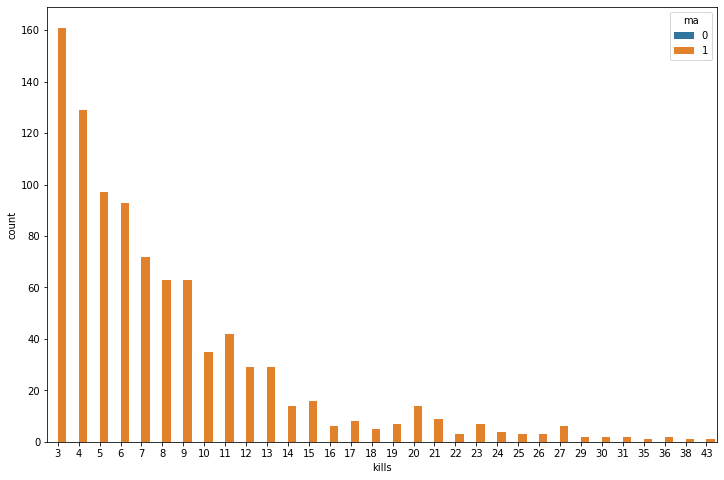

3     161
4     129
5      97
6      93
7      72
8      63
9      63
11     42
10     35
12     29
13     29
15     16
14     14
20     14
21      9
17      8
23      7
19      7
27      6
16      6
18      5
24      4
26      3
25      3
22      3
30      2
29      2
36      2
31      2
38      1
43      1
35      1
Name: kills, dtype: int64


In [42]:
countplot((df_todo_concat[(df_todo_concat.kills > 2) & (df_todo_concat.total_distance == 0)]["kills"]),12,8,hue=df_todo_concat.ma)

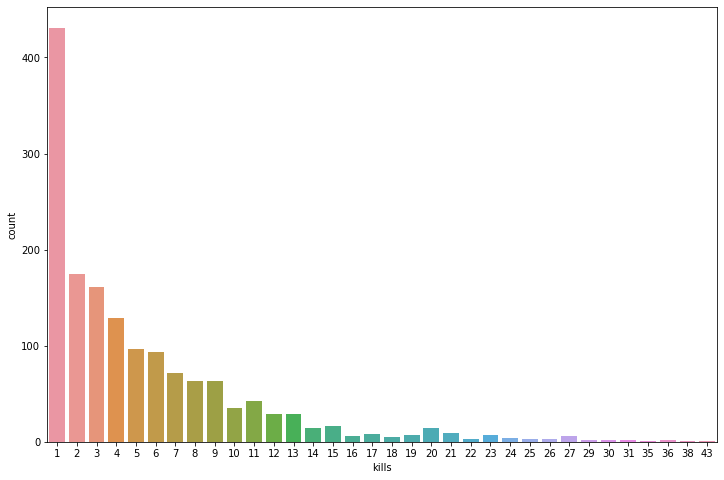

1     431
2     175
3     161
4     129
5      97
6      93
7      72
8      63
9      63
11     42
10     35
13     29
12     29
15     16
14     14
20     14
21      9
17      8
23      7
19      7
16      6
27      6
18      5
24      4
26      3
25      3
22      3
30      2
29      2
36      2
31      2
38      1
43      1
35      1
Name: kills, dtype: int64


In [73]:
countplot((df[(df.kills != 0) & (df.total_distance == 0)]["kills"]),12,8)

In [19]:
df_todo_concat[(df_todo_concat.kills > 10) & (df_todo_concat.total_item == 0)]["kills"]

72720      11
124986     14
181408     11
652889     16
669149     16
717108     11
999741     15
1204938    15
1234087    13
1414822    14
           ..
4354334    13
4377316    14
4386933    11
4391195    19
4402279    13
4407520    13
4411657    11
4413845    11
4418629    14
4420651    13
Name: kills, Length: 528, dtype: int64

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


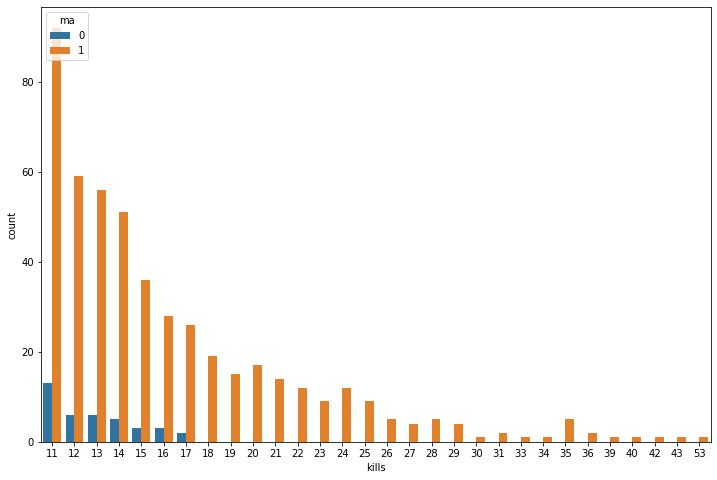

11    105
12     65
13     62
14     56
15     39
16     31
17     28
18     19
20     17
19     15
21     14
22     12
24     12
25      9
23      9
28      5
35      5
26      5
29      4
27      4
31      2
36      2
34      1
40      1
53      1
33      1
43      1
30      1
42      1
39      1
Name: kills, dtype: int64


In [20]:
countplot(df_todo_concat[(df_todo_concat.kills > 10) & (df_todo_concat.total_item == 0)]["kills"],12,8,hue=df_todo_concat.ma)

---

## featrure combination

In [19]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'total_item',
       'total_distance'],
      dtype='object')

In [36]:
df["score"] = (df.damageDealt + df.assists + df.kills + df.longestKill + df.killStreaks + df.boosts + df.heals + df.DBNOs + df.revives)

In [44]:
df["score1"] = df.damageDealt*13 + df.assists*8 + df.kills*9 + df.longestKill*4 + df.killStreaks*2 + df.boosts*10 + df.heals*6 + df.DBNOs*4 + df.revives*2

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='winPlacePerc'>

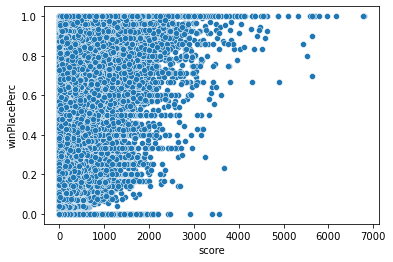

In [41]:
sns.scatterplot(df.score, df.winPlacePerc)

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score1', ylabel='winPlacePerc'>

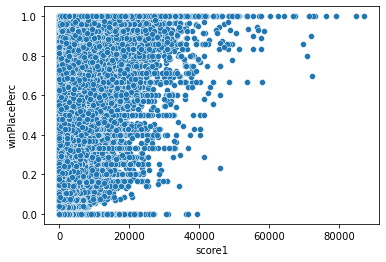

In [45]:
sns.scatterplot(df.score1, df.winPlacePerc)

In [46]:
df_score = df[["winPlacePerc","score1"]]

In [47]:
df_score.corr()

,winPlacePerc,score1
winPlacePerc,1.000000,0.458378
score1,0.458378,1.000000


---

## one-hot encoding
- 특정 columns만 1 주기
matchType  
1 : 'squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'  

In [47]:
a=pd.get_dummies(df.matchType, columns=['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'],drop_first=False)
a.crashfpp.value_counts()

0    4440678
1       6287
Name: crashfpp, dtype: int64

In [54]:
len(df[df.matchType=="crashfpp"])

6287

### t검정

In [64]:
from scipy import stats

In [67]:
print(notnormal_train.winPlacePerc.mean(), train.winPlacePerc.mean())

0.4957462188448124 0.47263829353233155


In [68]:
stats.ttest_ind(notnormal_train.winPlacePerc,train.winPlacePerc,equal_var=False)

Ttest_indResult(statistic=13.540255370862678, pvalue=1.1461774293295499e-41)

## 기타 그래프

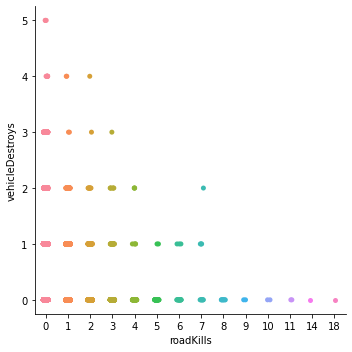

In [214]:
sns.catplot(data=df_todo_concat, x="roadKills", y="vehicleDestroys")

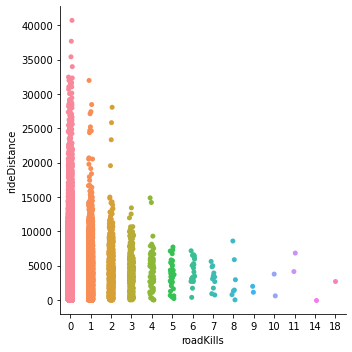

In [215]:
sns.catplot(data=df_todo_concat, x="roadKills", y="rideDistance")

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


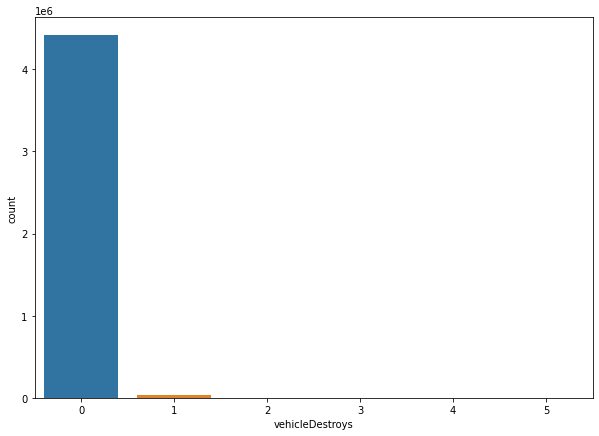

0    4413211
1      32422
2       1223
3         95
4         11
5          3
Name: vehicleDestroys, dtype: int64


In [85]:
countplot(df.vehicleDestroys)

In [93]:
print(df.winPlacePerc.mean())
print(df[df.vehicleDestroys==1].winPlacePerc.mean())
df[df.vehicleDestroys>1].winPlacePerc.mean()

0.4728215527219128
0.732723474801061


0.7833802552552553

/Users/krc/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


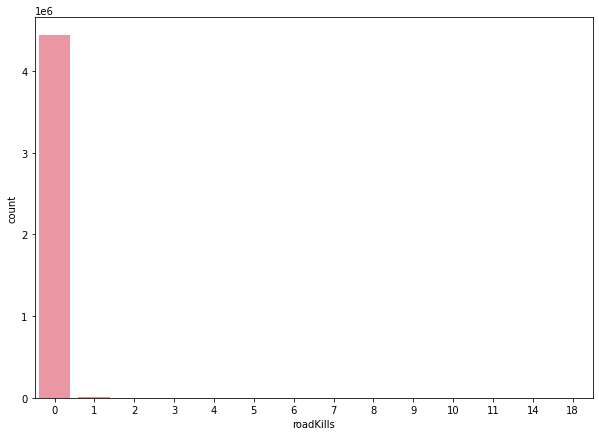

0     4433969
1       11247
2        1298
3         297
4          72
5          36
6          20
7          11
8           7
9           2
11          2
10          2
14          1
18          1
Name: roadKills, dtype: int64


In [86]:
countplot(df.roadKills)